## Correlate Spec Params & ERP measures

### Merge exp results with param results

In [38]:
# Define paths
REPO_PATH = r"C:\Users\micha\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'

# Dataset details
FS = 500 # sampling frequency
SESSIONS = ['L_SNR_250717', "A_SNR_140819"] # List of sessions to analyze

In [39]:
# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [40]:
# load dfs
erp_params_df = pd.read_csv(r'G:\Shared drives\v1_v4_1024\data\results\max_erp_params_df.csv', index_col=0)
spec_params_df = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv", index_col=0)

In [41]:
spec_params_df

,session,channel,chan_idx,array,epoch,exp,r2
0,A_SNR_140819,0,0,1,pre,3.660094,0.998489
1,A_SNR_140819,1,1,1,pre,3.641594,0.998853
2,A_SNR_140819,2,2,1,pre,3.096264,0.994847
3,A_SNR_140819,3,3,1,pre,3.603246,0.998999
4,A_SNR_140819,4,4,1,pre,3.485834,0.998878
...,...,...,...,...,...,...,...
4091,L_SNR_250717,59,1019,16,post,2.765816,0.998221
4092,L_SNR_250717,60,1020,16,post,2.800549,0.999511
4093,L_SNR_250717,61,1021,16,post,2.944253,0.999020
4094,L_SNR_250717,62,1022,16,post,3.043717,0.998485


## ! Issue !
What's going on here? erp_params_df only has 16 rows per session

In [42]:
erp_params_df = erp_params_df.drop(["session.1","channel.1","array.1"], axis=1)
erp_params_df

,array,channel,latency,amp,widths
session,,,,,
A_SNR_140819,1,63,245,84.516953,44.854905
A_SNR_140819,2,63,252,38.899398,38.806619
A_SNR_140819,3,63,236,99.295223,49.652683
A_SNR_140819,4,63,268,46.041053,79.048105
A_SNR_140819,5,63,282,220.183195,37.701534
A_SNR_140819,6,63,292,85.494644,138.421677
A_SNR_140819,7,63,280,94.192460,46.456190
A_SNR_140819,8,63,215,-34.635673,19.421330
A_SNR_140819,9,63,342,50.021300,19.372262


In [33]:
# Instead, below we will compute the change in expoent
# spec_params_df = spec_params_df.loc[spec_params_df["epoch"]=="post"]
# spec_params_df


,session,channel,chan_idx,array,epoch,exp,r2
1024,A_SNR_140819,0,0,1,post,4.409638,0.999214
1025,A_SNR_140819,1,1,1,post,4.448360,0.999085
1026,A_SNR_140819,2,2,1,post,4.079099,0.999065
1027,A_SNR_140819,3,3,1,post,4.603642,0.998497
1028,A_SNR_140819,4,4,1,post,4.313483,0.999089
...,...,...,...,...,...,...,...
4091,L_SNR_250717,59,1019,16,post,2.765816,0.998221
4092,L_SNR_250717,60,1020,16,post,2.800549,0.999511
4093,L_SNR_250717,61,1021,16,post,2.944253,0.999020
4094,L_SNR_250717,62,1022,16,post,3.043717,0.998485


,session,channel,chan_idx,array,exp_post,r2_post,exp_pre,r2_pre,exp_diff
0,A_SNR_140819,0,0,1,4.409638,0.999214,3.660094,0.998489,0.749545
1,A_SNR_140819,1,1,1,4.448360,0.999085,3.641594,0.998853,0.806766
2,A_SNR_140819,2,2,1,4.079099,0.999065,3.096264,0.994847,0.982835
3,A_SNR_140819,3,3,1,4.603642,0.998497,3.603246,0.998999,1.000396
4,A_SNR_140819,4,4,1,4.313483,0.999089,3.485834,0.998878,0.827650
...,...,...,...,...,...,...,...,...,...
2043,L_SNR_250717,59,1019,16,2.765816,0.998221,2.804417,0.995542,-0.038601
2044,L_SNR_250717,60,1020,16,2.800549,0.999511,2.610531,0.996774,0.190018
2045,L_SNR_250717,61,1021,16,2.944253,0.999020,3.011786,0.996864,-0.067533
2046,L_SNR_250717,62,1022,16,3.043717,0.998485,3.075089,0.997915,-0.031372


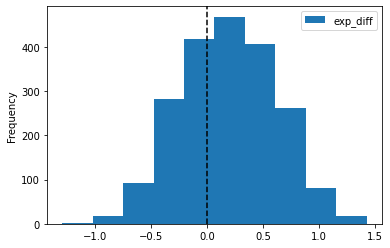

In [43]:
# compute stimulus-evoked change in exponent
df_post = spec_params_df.loc[spec_params_df["epoch"]=="post"]
df_pre = spec_params_df.loc[spec_params_df["epoch"]=="pre"]
df_merge = df_post.merge(df_pre, on=['session','channel','chan_idx','array'], suffixes=['_post', '_pre'])
df_params = df_merge.drop(columns=['epoch_pre','epoch_post'])
df_params['exp_diff'] = df_params['exp_post'] - df_params['exp_pre']

# plot
df_params.plot(y='exp_diff', kind='hist')
ax = plt.gca()
ax.axvline(0, color='k', linestyle='--')

# show df
df_params


In [7]:
# merge dataframes
results_df = pd.merge(left=erp_params_df, right=spec_params_df, on= ["session", "array", "channel"])
results_df.to_csv(r'G:\Shared drives\v1_v4_1024\data\results\spec_erp_results.csv')

In [8]:
results_df

,session,array,channel,peak_index,latency,amp,amp_abs,width,chan_idx,epoch,exp,r2
0,A_SNR_140819,1,0,3,229,65.528083,65.528083,35.027186,0,post,4.409638,0.999214
1,A_SNR_140819,1,1,2,228,66.172736,66.172736,22.755828,1,post,4.448360,0.999085
2,A_SNR_140819,1,2,5,228,54.551556,54.551556,37.283867,2,post,4.079099,0.999065
3,A_SNR_140819,1,3,3,228,56.616983,56.616983,36.523619,3,post,4.603642,0.998497
4,A_SNR_140819,1,4,2,228,63.665214,63.665214,22.758948,4,post,4.313483,0.999089
...,...,...,...,...,...,...,...,...,...,...,...,...
2043,L_SNR_250717,16,59,6,314,159.296016,159.296016,53.653837,1019,post,2.765816,0.998221
2044,L_SNR_250717,16,60,4,281,169.573607,169.573607,24.018671,1020,post,2.800549,0.999511
2045,L_SNR_250717,16,61,4,281,192.865965,192.865965,85.693658,1021,post,2.944253,0.999020
2046,L_SNR_250717,16,62,6,296,184.207147,184.207147,29.259395,1022,post,3.043717,0.998485


### plot exp and amp

exp = y
amp = x
scatterplot
color by session

In [9]:
results_df

,session,array,channel,peak_index,latency,amp,amp_abs,width,chan_idx,epoch,exp,r2
0,A_SNR_140819,1,0,3,229,65.528083,65.528083,35.027186,0,post,4.409638,0.999214
1,A_SNR_140819,1,1,2,228,66.172736,66.172736,22.755828,1,post,4.448360,0.999085
2,A_SNR_140819,1,2,5,228,54.551556,54.551556,37.283867,2,post,4.079099,0.999065
3,A_SNR_140819,1,3,3,228,56.616983,56.616983,36.523619,3,post,4.603642,0.998497
4,A_SNR_140819,1,4,2,228,63.665214,63.665214,22.758948,4,post,4.313483,0.999089
...,...,...,...,...,...,...,...,...,...,...,...,...
2043,L_SNR_250717,16,59,6,314,159.296016,159.296016,53.653837,1019,post,2.765816,0.998221
2044,L_SNR_250717,16,60,4,281,169.573607,169.573607,24.018671,1020,post,2.800549,0.999511
2045,L_SNR_250717,16,61,4,281,192.865965,192.865965,85.693658,1021,post,2.944253,0.999020
2046,L_SNR_250717,16,62,6,296,184.207147,184.207147,29.259395,1022,post,3.043717,0.998485


<AxesSubplot:xlabel='amp_abs', ylabel='exp'>

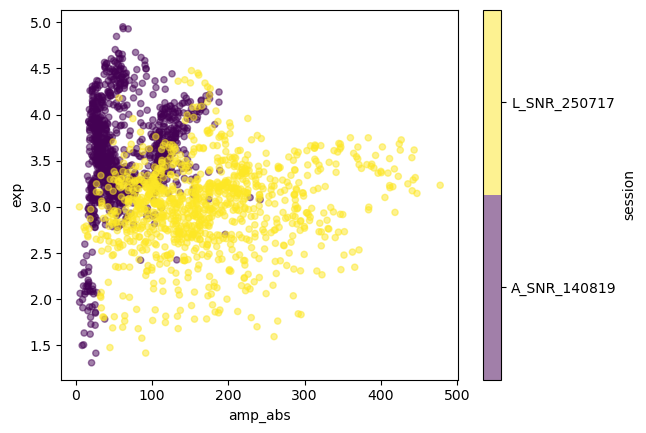

In [10]:
results_df['session'] = pd.Categorical(results_df['session'])
results_df.plot.scatter(x="amp_abs", y="exp", c="session", cmap="viridis", alpha=0.5)

(array([  1.,  11.,  45., 454., 422., 242., 205., 226., 138., 304.]),
 array([ 44.,  79., 114., 149., 184., 219., 254., 289., 324., 359., 394.]),
 <BarContainer object of 10 artists>)

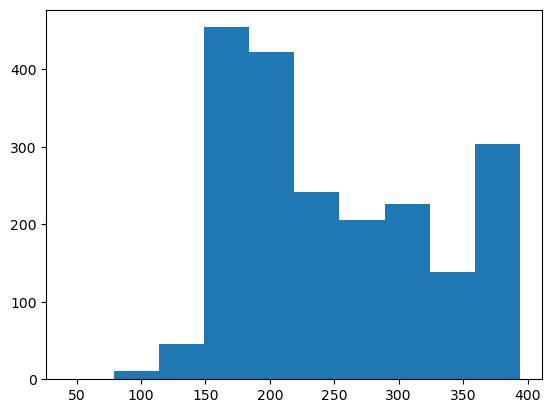

In [11]:
time = np.arange(-0.3, 0.7, 1/FS) * 1000
plt.hist(time[results_df['latency']])

### linear regression 


linear regression for each session
run what's needed for additional session to continue with 3

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_df["amp_abs"], y=results_df["exp"])

In [13]:
y_pred = intercept + slope*results_df["amp_abs"]

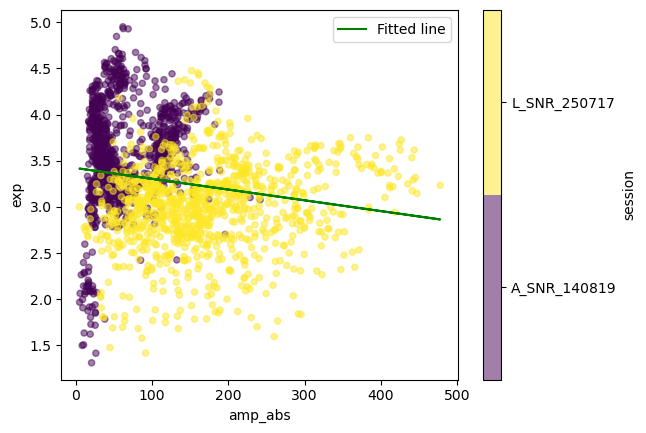

In [14]:
results_df.plot.scatter(x="amp_abs", y="exp", c="session", cmap="viridis", alpha=0.5)
plt.plot(results_df["amp_abs"],y_pred, color="green", label="Fitted line")
plt.legend()
plt.show()

In [44]:
colors = np.array(["red", "green"])

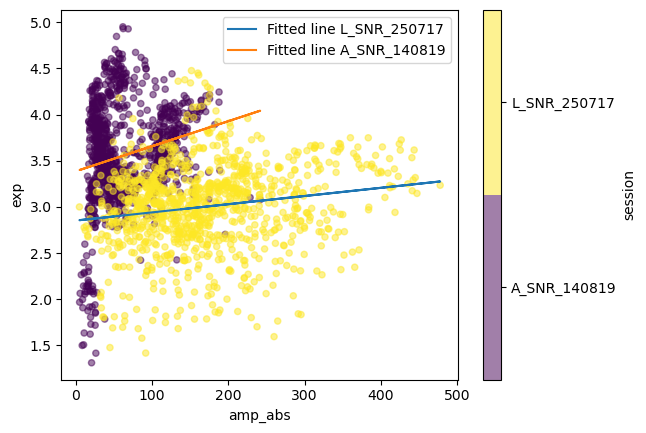

In [46]:
# create linear regression by session
ax = results_df.plot.scatter(x="amp_abs", y="exp", c="session", cmap="viridis", alpha=0.5)
for session in SESSIONS: 
    results_session = results_df.loc[results_df["session"]==session]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp_abs"], y=results_session["exp"])
    y_pred = intercept + slope*results_session["amp_abs"]

    plt.plot(results_session["amp_abs"],y_pred, label=f"Fitted line {session}")
plt.legend()
plt.show()

#ax.figure.savefig(r"G:\Shared drives\v1_v4_1024\figures\linregress_exp_ampabs.png")


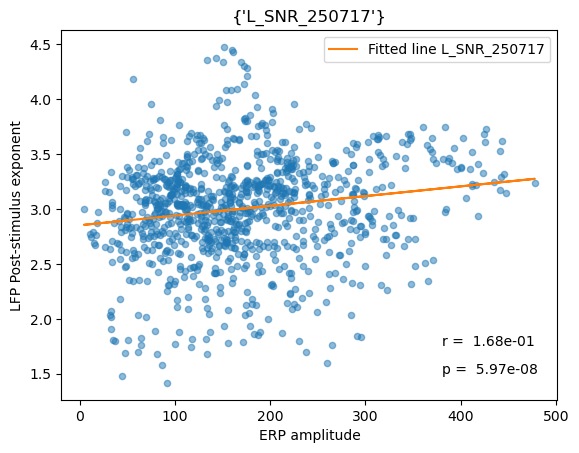

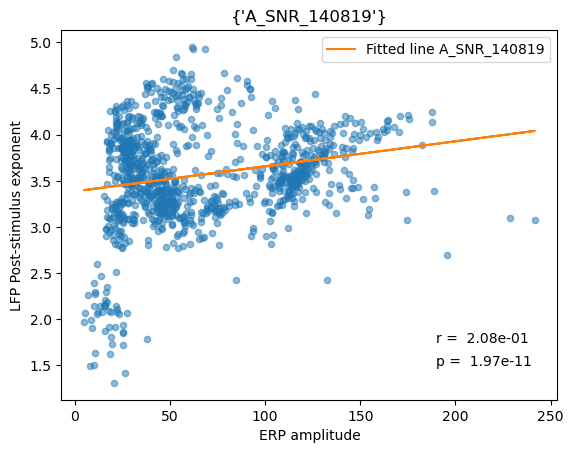

In [70]:
for session in SESSIONS:
    results_session = results_df.loc[results_df["session"]==session]

    ax = results_session.plot.scatter(x="amp_abs", y="exp", alpha=0.5)
    plt.ylabel("LFP Post-stimulus exponent")
    plt.xlabel("ERP amplitude")
    plt.title({session})
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp_abs"], y=results_session["exp"])
    y_pred = intercept + slope*results_session["amp_abs"]

    plt.plot(results_session["amp_abs"],y_pred, label=f"Fitted line {session}", color="C1")

    if session == "L_SNR_250717":
        plt.text(380, 1.75,  f'r = {rvalue: .2e}')
        plt.text(380, 1.5, f'p = {pvalue: .2e}')

    else:
        plt.text(190, 1.75, f'r = {rvalue: .2e}')
        plt.text(190, 1.5, f'p = {pvalue: .2e}')

    plt.legend()
    plt.show()

    ax.figure.savefig(fr"G:\Shared drives\v1_v4_1024\figures\linregress_{session}.png")